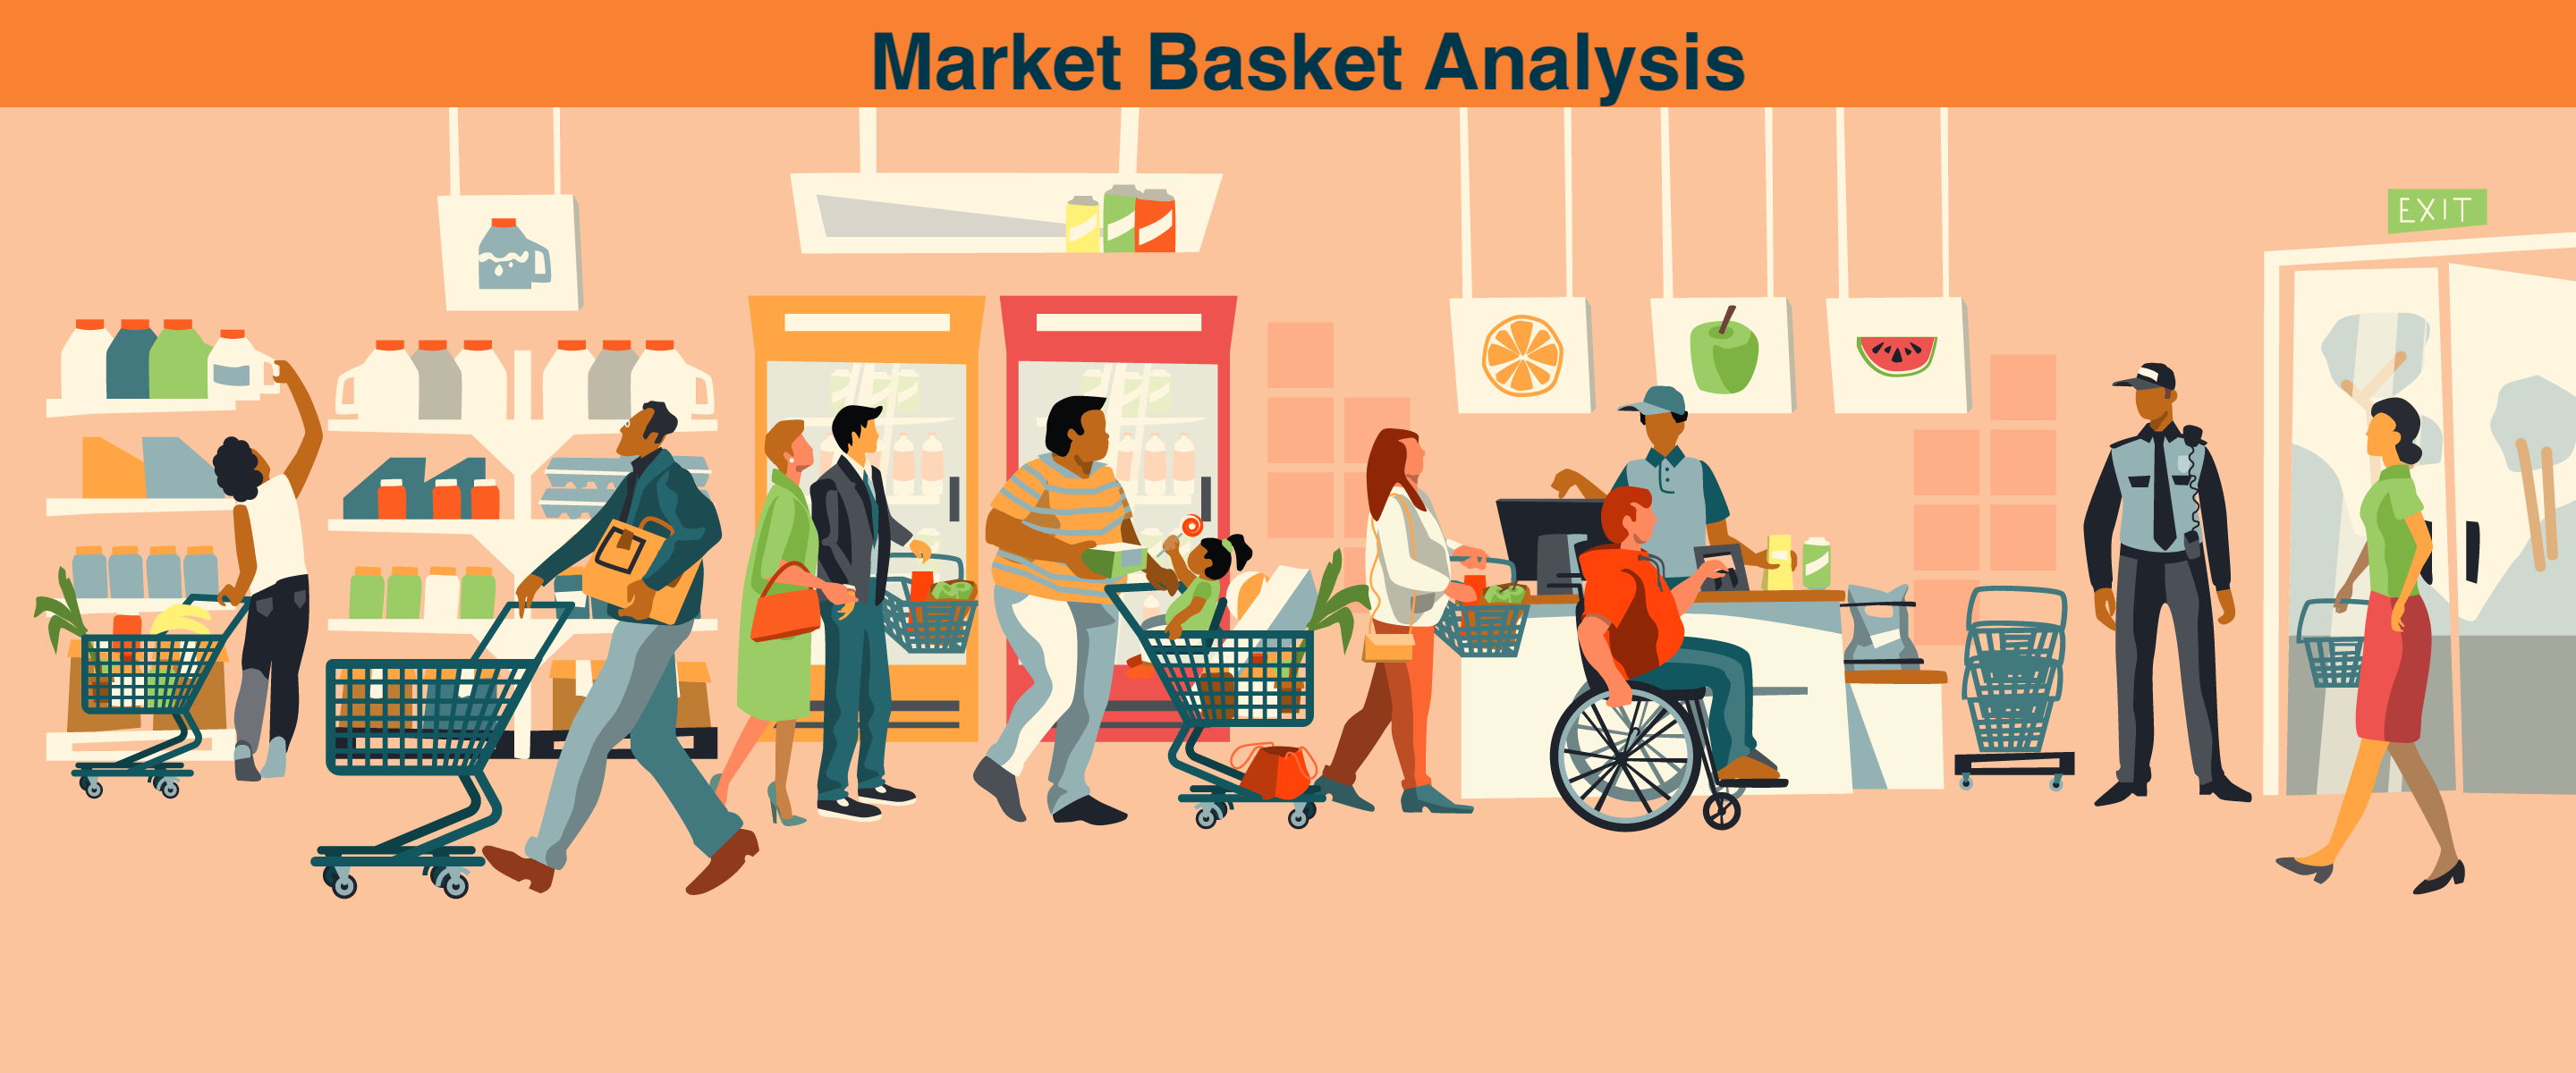

Market Basket Analysis (MBA) is a data mining technique used to identify associations or co-occurrences between different items in a dataset. It is widely used in retail and e-commerce to understand the purchase behavior of customers. The main goal is to uncover patterns of items that frequently appear together in transactions, which can help in marketing strategies, inventory management, and product placements.

By using Market Basket Analysis we are mostly interested in finding out product Affinity or product relationship that is which item sells best with which other item 

### Key Concepts

1. Itemset: A collection of one or more items.
2. Transaction: A record of items purchased together in a single purchase event.
3. Support: The proportion of transactions that contain a particular itemset (combination of item).
4. Confidence: A measure of how often items in a rule appear together, given the presence of the antecedent.
5. Lift: The ratio of the observed support to that expected if the items were independent.

### Why Use Market Basket Analysis?

- Cross-Selling: Suggest related products to customers.
- Product Placement: Optimize the arrangement of products in a store.
- Promotions: Design effective promotions based on frequently bought together items.
- Inventory Management: Stock items that are often bought together.

### Where are we using Market Basket Analysis
- Retail Industry
- Telecommunications
- Financial Services.

### Limitations
- Cannot identify causality
- small number of products or transactions

### What is Association Rule Mining?
Association rule mining is a technique to identify frequent patterns and associations among a set of items.      
For example, understanding customer buying habits. By finding correlations and associations between different items that customers place in their ‘shopping basket,’ recurring patterns can be derived.

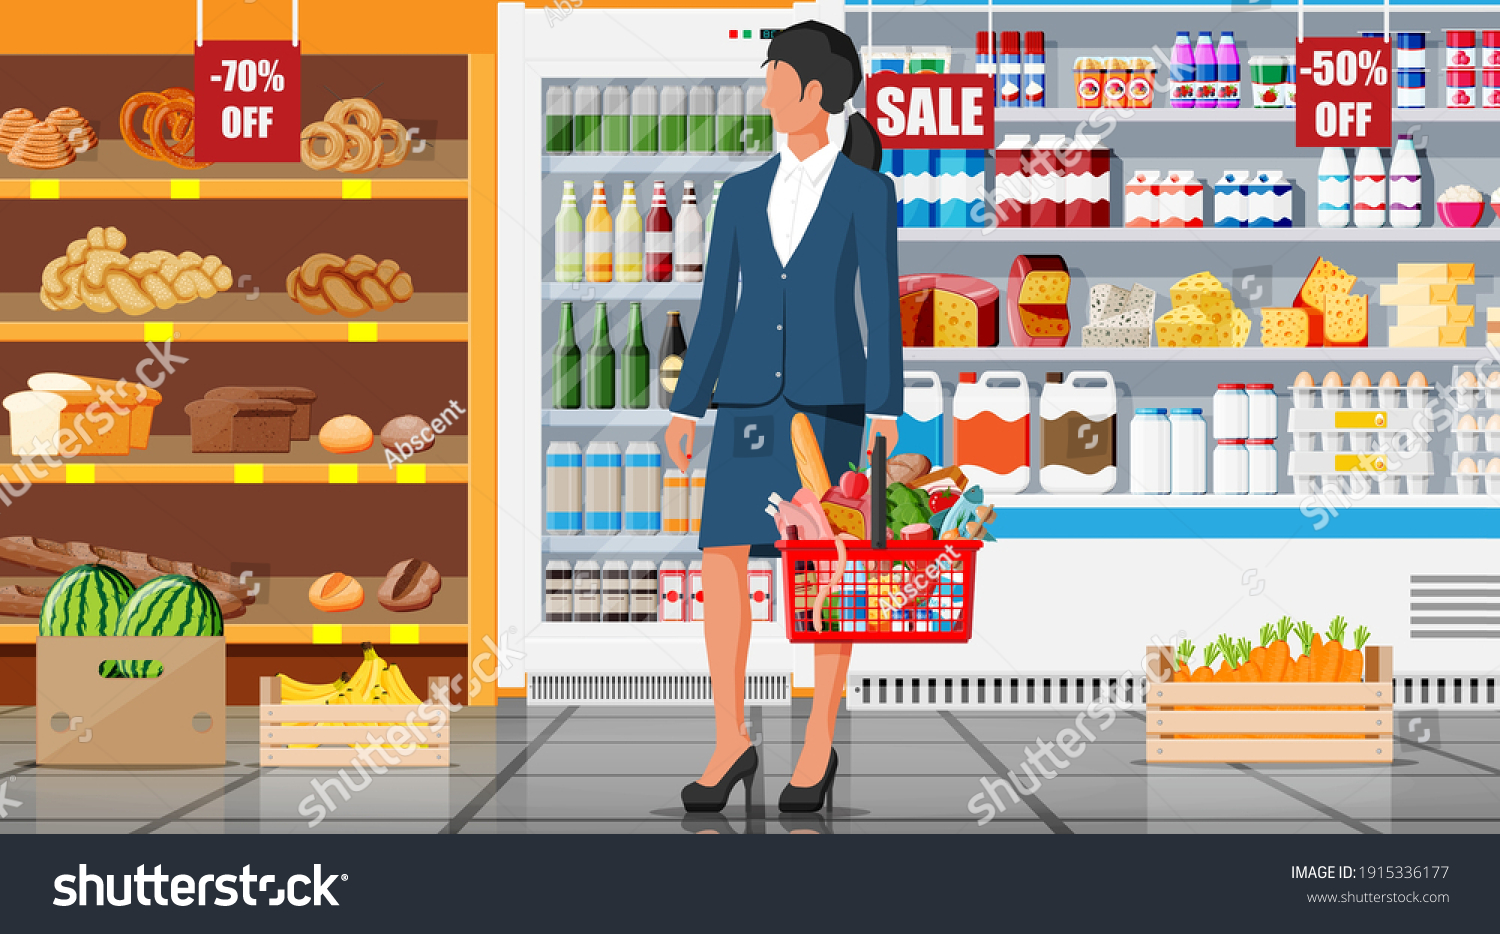

Example:- 
Say, Surya goes to buy a bottle of old monk🍾🍾🍾 from the MRP. He also grabs a couple of chips as well. The manager there analyses that, not only Surya, people often tend to buy old monk and chips together. After finding out the pattern, the manager starts to arrange these items together and notices an increase in sales.

This process of identifying an association between products/items is called association rule mining. To implement association rule mini the Apriori algorithm is one of the most popular algorithm

### What Is an Apriori Algorithm?
Apriori algorithm assumes that any subset of a frequent itemset must be frequent

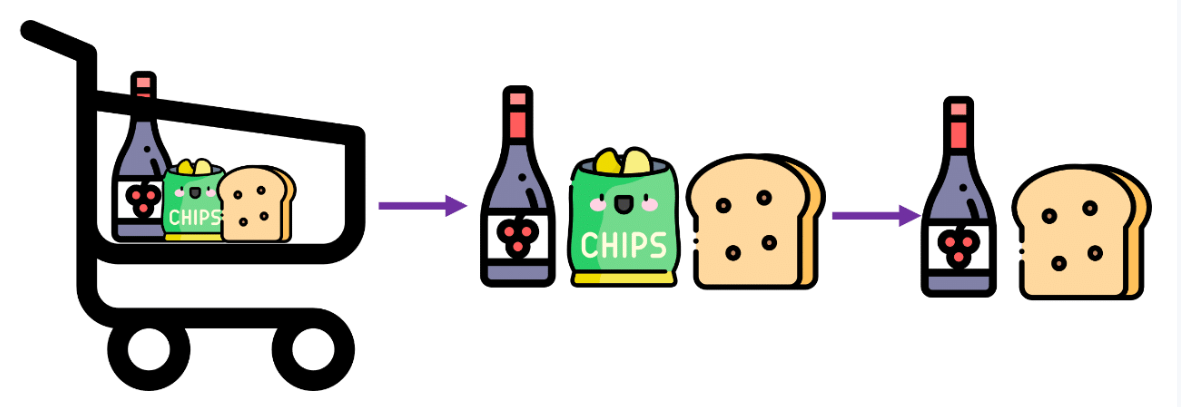

Say, a transaction containinold monkine, chipcokeead} also contains {wincokeead}. So, according to the principle of Apriori, iold monkine, chipcokeead} is frequent, theold monkincokeead} must also be frequent.

### How Does the Apriori Algorithm Work?
The key concept in the Apriori algorithm is that it assumes all subsets of a frequent itemset to be frequent. Similarly, for any infrequent itemset, all its supersets must also be infrequent.

Let us try and understand the workings of an Apriori algorithm with the help of a very famous business scenario, market basket analysis.

Here is a dataset consisting of six transactions in an hour. Each transaction is a combination of 0s and 1s, where 0 represents the absence of an item and 1 represents the presence of it..ng

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({'Transaction_ID':[1,2,3,4,5,6],'Item1':['Wine','Wine','Mat','Shirt','Wine','Wine'],'Item2':['Chips','Banana','Pen','Chips','Chips','Chips'],'Item3':['Bread','Bread','Bread','Apple','Bread','Mango'],'Item4':['Milk','Milk','Milk','Soap','Milk','Milk']})
df

,Transaction_ID,Item1,Item2,Item3,Item4
0,1,Wine,Chips,Bread,Milk
1,2,Wine,Banana,Bread,Milk
2,3,Mat,Pen,Bread,Milk
3,4,Shirt,Chips,Apple,Soap
4,5,Wine,Chips,Bread,Milk
5,6,Wine,Chips,Mango,Milk


In [5]:
pd.get_dummies(df).astype('int')

,Transaction_ID,Item1_Mat,Item1_Shirt,Item1_Wine,Item2_Banana,Item2_Chips,Item2_Pen,Item3_Apple,Item3_Bread,Item3_Mango,Item4_Milk,Item4_Soap
0,1,0,0,1,0,1,0,0,1,0,1,0
1,2,0,0,1,1,0,0,0,1,0,1,0
2,3,1,0,0,0,0,1,0,1,0,1,0
3,4,0,1,0,0,1,0,1,0,0,0,1
4,5,0,0,1,0,1,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,1,1,0


In [6]:
df1 = pd.get_dummies(df).astype('int')
df1.columns = ['Transaction_ID','Mat','Shirt','Wine','Banana','Chips','Pen','Apple','Bread','Mango','Milk','Soap']

In [7]:
# Extracting only few items for making analysis
df1[['Transaction_ID','Wine','Chips','Bread','Milk']]

,Transaction_ID,Wine,Chips,Bread,Milk
0,1,1,1,1,1
1,2,1,0,1,1
2,3,0,0,1,1
3,4,0,1,0,0
4,5,1,1,1,1
5,6,1,1,0,1


We can find multiple rules in this scenario. For example, in a transaction of wine, chips, and bread, if wine and chips are bought, then customers also buy bread.
    
{wine, chips} =>; {bread}       
To select the interesting rules out of multiple possible rules from this small business scenario, we will be using the following measures:
- Support       
- Confidence     
- Lift

### What is Support?

1. Support is a key metric used in the Apriori Algorithm, which is a popular method for finding frequent itemsets in transactional data.
2. In simple terms, support measures how frequently an itemset (a collection of one or more items) appears in a dataset of transactions.

Support of item x is nothing but the ratio of the number of transactions in which item x appears to the total number of transactions.

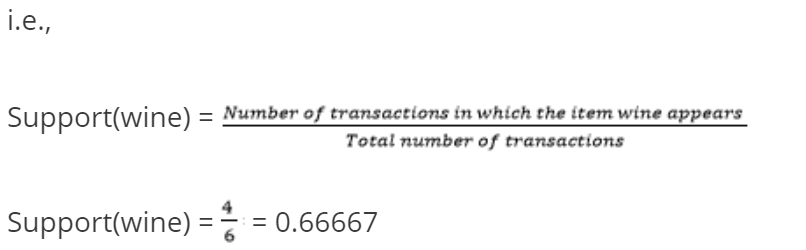

### Support of A = p(A)
### Support of B = p(B)
### Support of A&B = p(A n B)
.

### Confidence
What is the confidence of A when B has already been added to the cart?   

#### confidence of A when B has already been added to the cart = Support of A&B/ Support of B
#### confidence of Wine when Chips has already been added to the cart = Support of Wine Given Chips/ Support of Chips
                                                          = support(wine,chips)/support(chips)  
                                                          = (3/6)/(4/6) 
                                                          = 0.75
#### When chips is already present in the cart wine is found in 75% transactions (when ever you buy chips 75% of chances that you also buy wine)

Confidence (x => y) signifies the likelihood of the item y being purchased when item x is purchased. This method takes into account the popularity of item x.
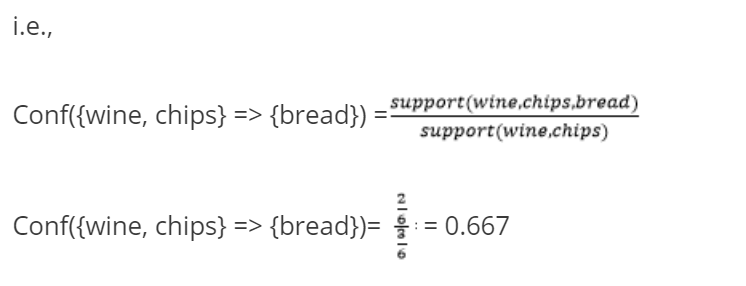

### Lift
Lift (x => y) is nothing but the ‘interestingness’ or the likelihood of the item y being purchased when item x is sold. Unlike confidence (x => y), this method takes into account the popularity of the item y.

#### Lift = Confidence of Wine given Chips/ Support of Wine
                            = 0.75/(4/6)
                            = 0.75/0.66
                            = 1.125
- Lift (x => y) = 1 means that there is no correlation within the itemset.- 
Lift (x => y) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, x and y, are more likely to be bought together
- 
Lift (x => y) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, x and y, are unlikely to be bought togethe


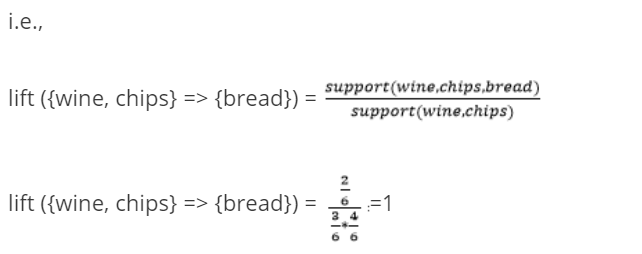r.

### Now will try to solve it

### Step 1: Create a frequency table of all the items that occur in all transactions

In [16]:
df

,Transaction_ID,Item1,Item2,Item3,Item4
0,1,Wine,Chips,Bread,Milk
1,2,Wine,Banana,Bread,Milk
2,3,Mat,Pen,Bread,Milk
3,4,Shirt,Chips,Apple,Soap
4,5,Wine,Chips,Bread,Milk
5,6,Wine,Chips,Mango,Milk


In [17]:
# Flatten the DataFrame
items = df[['Item1', 'Item2', 'Item3', 'Item4']].values.flatten()

# Create a DataFrame to count frequencies
item_counts = pd.Series(items).value_counts().reset_index()
item_counts.columns = ['Item', 'Frequency']

print("Item Frequency DataFrame:")
item_counts


Item Frequency DataFrame:


,Item,Frequency
0,Milk,5
1,Wine,4
2,Chips,4
3,Bread,4
4,Banana,1
5,Mat,1
6,Pen,1
7,Shirt,1
8,Apple,1
9,Soap,1


### Step 2: Find the significant items based on the support threshold
Support threshold = 3

In [18]:
dft = item_counts[item_counts['Frequency']>3]
dft

,Item,Frequency
0,Milk,5
1,Wine,4
2,Chips,4
3,Bread,4


### Step 3: From the significant items, make possible pairs irrespective of the order

In [19]:
df

,Transaction_ID,Item1,Item2,Item3,Item4
0,1,Wine,Chips,Bread,Milk
1,2,Wine,Banana,Bread,Milk
2,3,Mat,Pen,Bread,Milk
3,4,Shirt,Chips,Apple,Soap
4,5,Wine,Chips,Bread,Milk
5,6,Wine,Chips,Mango,Milk


In [20]:
from itertools import combinations
from collections import Counter

# Extracting all item pairs from each transaction
pairs = []

for index, row in df.iterrows():
    items = [row['Item1'], row['Item2'], row['Item3'], row['Item4']]
    for combo in combinations(items, 2):
        pairs.append(combo)

# Counting the frequency of each item pair
pair_counts = Counter(pairs)

# Creating a DataFrame for the item pairs and their frequencies
pair_data = [{'Item': f"{pair[0]}, {pair[1]}", 'Frequency': freq} for pair, freq in pair_counts.items()]
pair_df = pd.DataFrame(pair_data)

pair_df

,Item,Frequency
0,"Wine, Chips",3
1,"Wine, Bread",3
2,"Wine, Milk",4
3,"Chips, Bread",2
4,"Chips, Milk",3
5,"Bread, Milk",4
6,"Wine, Banana",1
7,"Banana, Bread",1
8,"Banana, Milk",1
9,"Mat, Pen",1


### Step 4: Again, find the significant items based on the support threshold

In [21]:
pair_df[pair_df['Frequency']>3]

,Item,Frequency
2,"Wine, Milk",4
5,"Bread, Milk",4


### Step 5: Now, make a set of three items that are bought together based on the significant items from Step 4

In [22]:
# Extracting all item pairs from each transaction
pairs = []

for index, row in df.iterrows():
    items = [row['Item1'], row['Item2'], row['Item3'], row['Item4']]
    for combo in combinations(items, 3):
        pairs.append(combo)

# Counting the frequency of each item pair
pair_counts = Counter(pairs)

# Creating a DataFrame for the item pairs and their frequencies
pair_data = [{'Item': f"{pair[0]}, {pair[1]}, {pair[2]}", 'Frequency': freq} for pair, freq in pair_counts.items()]
pair_df = pd.DataFrame(pair_data)

pair_df

,Item,Frequency
0,"Wine, Chips, Bread",2
1,"Wine, Chips, Milk",3
2,"Wine, Bread, Milk",3
3,"Chips, Bread, Milk",2
4,"Wine, Banana, Bread",1
5,"Wine, Banana, Milk",1
6,"Banana, Bread, Milk",1
7,"Mat, Pen, Bread",1
8,"Mat, Pen, Milk",1
9,"Mat, Bread, Milk",1


In [23]:
pair_df.sort_values('Frequency',ascending = False).head(2)

,Item,Frequency
2,"Wine, Bread, Milk",3
1,"Wine, Chips, Milk",3


#### {Wine, Bread, Milk} is the only significant item set we have got from the given data. But in real-world scenarios, we would have dozens of items to build rules from. Then, we might have to make four/five-pair itemsets.

### Now will perform the same using Apriori Algorithm 

### Problem Statement
The manager of a retail store is trying to find out an association rule between six items, to figure out which items are more often bought together so that he can keep the items together in order to increase sales.

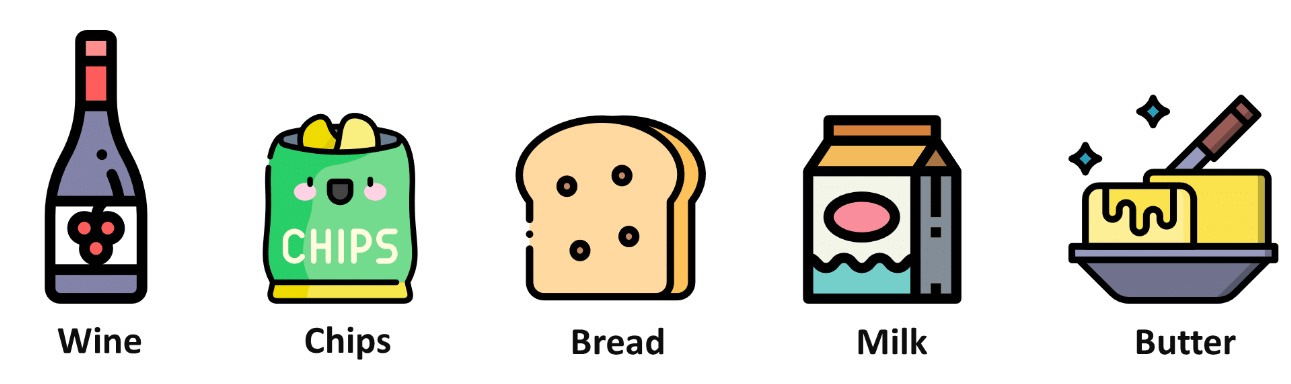

### Importing the necessary libraries

In [ ]:
# !pip install mlxtend

In [24]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
df = pd.read_excel('MBA.xlsx',header = None)
df

,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,NaN,Bread,Butter,Milk,NaN
2,NaN,NaN,Bread,Butter,Milk,NaN
3,NaN,Chips,NaN,NaN,NaN,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,Wine,Chips,NaN,NaN,Milk,NaN
6,Wine,Chips,Bread,Butter,NaN,Apple
7,Wine,Chips,NaN,NaN,Milk,NaN
8,Wine,NaN,Bread,NaN,NaN,Apple
9,Wine,NaN,Bread,Butter,Milk,NaN


In [28]:
df.shape

(22, 6)

### Convert Pandas DataFrame into a list of lists

In [46]:
df.fillna('others')

,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,others,Bread,Butter,Milk,others
2,others,others,Bread,Butter,Milk,others
3,others,Chips,others,others,others,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,Wine,Chips,others,others,Milk,others
6,Wine,Chips,Bread,Butter,others,Apple
7,Wine,Chips,others,others,Milk,others
8,Wine,others,Bread,others,others,Apple
9,Wine,others,Bread,Butter,Milk,others


In [48]:
pd.get_dummies(df)

,0_Wine,1_Chips,2_Bread,3_Butter,4_Milk,5_Apple
0,True,True,True,True,True,True
1,True,False,True,True,True,False
2,False,False,True,True,True,False
3,False,True,False,False,False,True
4,True,True,True,True,True,True
5,True,True,False,False,True,False
6,True,True,True,True,False,True
7,True,True,False,False,True,False
8,True,False,True,False,False,True
9,True,False,True,True,True,False


In [59]:
apriori(pd.get_dummies(df), min_support=0.50, use_colnames=True)

,support,itemsets
0,0.727273,(0_Wine)
1,0.636364,(1_Chips)
2,0.727273,(2_Bread)
3,0.681818,(3_Butter)
4,0.727273,(4_Milk)
5,0.636364,(5_Apple)
6,0.590909,"(0_Wine, 2_Bread)"
7,0.500000,"(3_Butter, 0_Wine)"
8,0.590909,"(4_Milk, 0_Wine)"
9,0.590909,"(3_Butter, 2_Bread)"


In [49]:
pd.DataFrame([{item: (item in transaction) for item in all_items} for transaction in df.values])

,Wine,Chips,Bread,Butter,Milk,Apple,
0,True,True,True,True,True,True,False
1,True,False,True,True,True,False,False
2,False,False,True,True,True,False,False
3,False,True,False,False,False,True,False
4,True,True,True,True,True,True,False
5,True,True,False,False,True,False,False
6,True,True,True,True,False,True,False
7,True,True,False,False,True,False,False
8,True,False,True,False,False,True,False
9,True,False,True,True,True,False,False


In [60]:
# Fill NaN values with an empty string and then stack to get a Series of all items
all_items = df.fillna('').stack().unique()

# One-hot encode the transaction data
one_hot = pd.DataFrame([{item: (item in transaction) for item in all_items} for transaction in df.values])

# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.50, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Filter the rules based on the lift criterion
rules = rules[rules['lift'] > 1.2]

# Display the rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,"(Milk, Bread)",(Butter),0.545455,0.681818,0.5,0.916667,1.344444,0.128099,3.818182,0.563636
17,(Butter),"(Milk, Bread)",0.681818,0.545455,0.5,0.733333,1.344444,0.128099,1.704545,0.805195


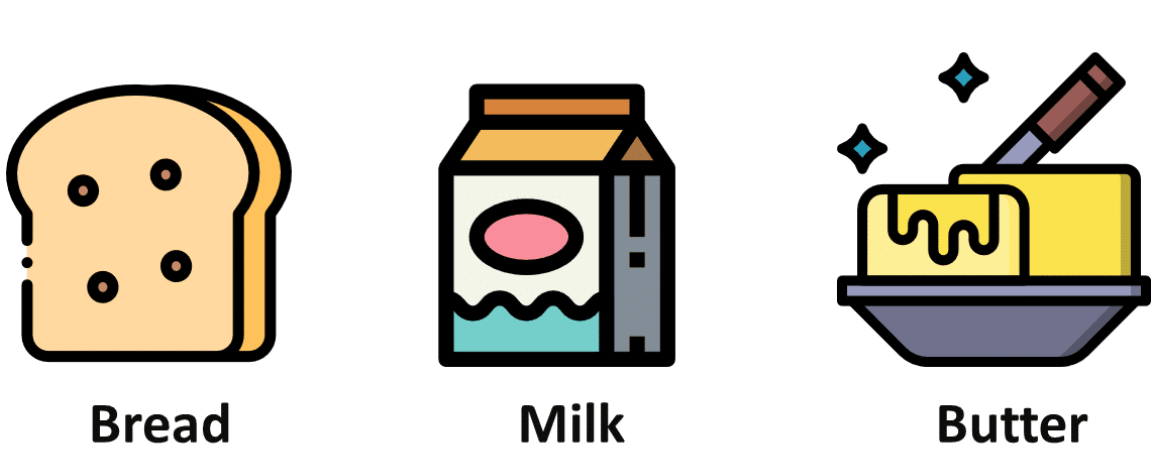